<a href="https://colab.research.google.com/github/hyojk2001/Python-Based-Data-Analysis/blob/main/0610_mlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# OpenCV로 모자이크 처리하기

import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

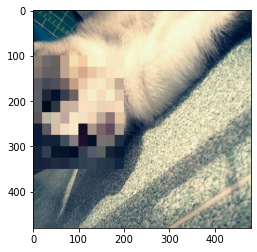

In [18]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지를 불러오고 모자이크 처리하기 
img = cv2.imread("cat.jpg")
mos = mosaic(img, (0, 100, 200, 350), 10)

# 이미지 출력하기 
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()


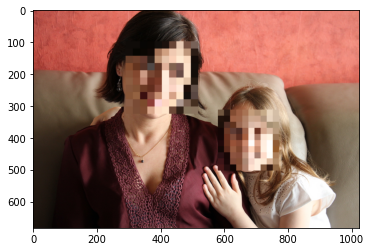

In [24]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기 --- (*4)
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



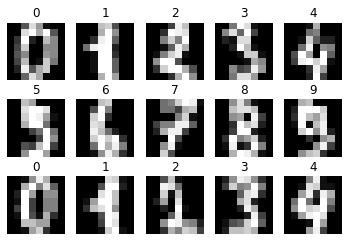

In [27]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

for i in range(15):
  plt.subplot(3,5,i+1)
  plt.axis('off')
  plt.title(str(digits.target[i]))
  plt.imshow(digits.images[i], cmap='gray')

plt.show()

In [29]:
d0 = digits.image[0]
plt.imshow(d0, cmpa='gray')
plt.show()
print(d0)

AttributeError: ignored

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# 데이터 읽기
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1,64))  # 2차원 배열을 1차원 배열로 변환

# 데이터를 학습/테스트 전용으로 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# 데이터 학습
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 예측하고 정답률 출력
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.925


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [58]:
# 준비한 이미지 판정하기

import cv2
from sklearn.externals import joblib

def predict_digit(filename):
  # 학습한 데이터 읽어들이기
  clf = joblib.load('digits.pkl')
  # 직접 그린 손글씨 이미지 읽어들이기
  my_img = cv2.imread(filename)
  # 이미지 데이터를 학습에 적합하게 변환
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
  my_img = cv2.resize(my_img, (8,8))
  my_img = 15 - my_img // 16   # 흑백 반전
  # 2차원 배열을 1차원 배열로 변환
  my_img = my_img.reshape((-1,64))
  res = clf.predict(my_img)
  return res[0]


# 이미지 파일 지정 및 실행
n = predict_digit('my2.png')
print('my2.png = ' + str(n))
n = predict_digit('my4.png')
print('my4.png = ' + str(n))
n = predict_digit('my9.png')
print('my9.png = ' + str(n))

# 데이터가 많지 않으면 결과가 왜곡이 된다

my2.png = 2
my4.png = 4
my9.png = 4


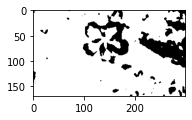

In [62]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('flower.jpg')
img = cv2.resize(img, (300,169))

# 색공간 변형
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)
im2 = cv2.threshold(gray, 140,240,cv2.THRESH_BINARY_INV)[1]

#  화면 왼쪽에 변환한 이미지 출력
plt.subplot(1,2,1)
plt.imshow(im2, cmap='gray')

In [67]:
# 윤곽 검출
cnts = cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[1]

# 검출한 윤곽 그리기
for pt in cnts:
  x,y,w,h = cv2.boundingRect(pt)
  if w<30 or w>200 : continue
  print(x,y,w,h)
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# 화면 오른쪽에 결과 출력
plt,subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig('find_contours.pong', dpi=200)
plt.show()

error: ignored

In [68]:
# 영상을 받아 인식해보기

import cv2
import numpy as np

# 웹 카메라로부터 입력받기
cap = cv2.VideoCapture(0)
while True:
  # 카메라의 이미지 읽어들이기
  _, frame = cap.read()
  # 이미지를 축소해서 출력하기
  frame = cv2.resize(frame, (500,300))
  # 윈도우에 이미지 출력하기
  cv2.imshow('OpenCV Web Camera', frame)
  # ESC 또는 Enter 키 입력되면 반복 종료하기
  k = cv2.waitKey(1)    # 1초 대기
  if k==27 or k==13: break

cap.release()   # 카메라 해제
cv2.destroyAllWindows()   # 윈도우 제거

error: ignored

In [69]:
########################################################################

In [70]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Unicode 코드 포인트로 출현빈도 판정
def count_codePoint(str):
  # 각 문자를 Unicode 코드 포인트로 변환
  counter = np.zeros(65535)
  for i in range(len(str)):
    # 각 문자를 Unicode 코드 포인트로 변환
    code_point = ord(str[i])
    if code_point > 65535:
      continue
    # 출현 횟수 세기
    counter[code_point] += 1
  # 각 요소를 문자 수로 나눠 정규화
  counter = counter/len(str)
  return counter

In [75]:
# 학습 전용 데이터
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'

x_train = [count_codePoint(ko_str), count_codePoint(ja_str), count_codePoint(en_str)]
y_train = ['ko','ja','en']

clf = GaussianNB()
clf.fit(x_train,y_train)

ko_test_str = '안녕하세요'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'

x_test = [count_codePoint(en_test_str), count_codePoint(ja_test_str), count_codePoint(ko_test_str)]
y_test = ['en','ja','ko']

y_pred = clf.predict(x_test)
print(y_pred)
print('정답률 = ', accuracy_score(y_test, y_pred))

['en' 'ja' 'ko']
정답률 =  1.0


In [76]:
######################################################

In [81]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import glob

# Unicode 코드 포인트로 출현 빈도 판정하기
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기
    counter = np.zeros(65535)

    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기
    counter = counter/len(str)
    return counter

In [84]:
# 학습 데이터 준비하기 --- (*1)
index = 0
x_train = []
y_train = []
for file in glob.glob('./train/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기 --- (*2)
    y_train.append(file[8:10])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기 --- (*3)
    file_str = ''
    for line in open(file, 'r'):
        file_str = file_str + line
    x_train.append(count_codePoint(file_str))

# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

# 평가 데이터 준비하기 --- (*4)
index = 0
x_test = []
y_test = []
for file in glob.glob('./test/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기
    y_test.append(file[7:9])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기
    file_str = ''
    for line in open(file, 'r'):
        file_str = file_str + line
    x_test.append(count_codePoint(file_str)) 

# 평가하기
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))

['de' 'en' 'es']
정답률 =  1.0


In [85]:
##################################################

In [89]:
# !pip install konlpy

In [94]:
from konlpy.tag import Okt

okt = Okt()
# 형태소 분석
malist = okt.pos('아버지 가방에 들어가신다.', norm=True, stem=True)
print(malist)

malist = okt.pos('아버지가 가방에 들어가신다.', norm=True, stem=True)
print(malist)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]
[('아버지', 'Noun'), ('가', 'Josa'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]
